In [1]:
!pip install basicsr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 34.5 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214816 sha256=71b0735a6576e548088776400fcd49d0c63e827c442c23ba9c201f951d9e3192
  Stored in directory: /root/.cache/pip/wheels/38/83/99/2d8437cc652a01af27df5ff037a4075e95b52d67705c5f30ca
Successfully built basicsr


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
from torchvision import transforms
from PIL import Image

In [4]:
# Check if CUDA (GPU support) is available
cuda_available = torch.cuda.is_available()
# cuda_available = False
if cuda_available:
    print("CUDA (GPU support) is available.")
else:
    print("CUDA (GPU support) is not available. Running on CPU.")

CUDA (GPU support) is available.


In [5]:
# Load generator
generator_path = '/content/drive/MyDrive/ImgPro/RealESRGAN/models/trained/generator.pth'
generator = torch.load(generator_path)

# Move the model to GPU if available
if cuda_available:
  generator = generator.cuda()

generator.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


RRDBNet(
  (conv_first): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (body): Sequential(
    (0): RRDB(
      (rdb1): ResidualDenseBlock(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv4): Conv2d(160, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv5): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
      )
      (rdb2): ResidualDenseBlock(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv4): Conv2d(160, 32, kernel_size=(3, 3), stride=(1, 1), 

In [8]:
# Open test image and change to tensor
test_img = Image.open('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/lq1.png')
transform = transforms.Compose([
    transforms.ToTensor()
])
test_tensor = transform(test_img).unsqueeze(0)
if cuda_available:
  test_tensor = test_tensor.cuda()

# Set the model to evaluation mode
generator.eval()

# Generate image from newly trained model
with torch.no_grad():
    test = generator(test_tensor)

# Cap to [0, 1]
test = torch.clamp(test, 0, 1)

# Change to Image
output_img = transforms.ToPILImage()(test.squeeze(0))

# Save image
output_img.save('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/test1.png')

In [9]:
# Open test image and change to tensor
test_img = Image.open('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/lq2.png')
transform = transforms.Compose([
    transforms.ToTensor()
])
test_tensor = transform(test_img).unsqueeze(0)
if cuda_available:
  test_tensor = test_tensor.cuda()

# Set the model to evaluation mode
generator.eval()

# Generate image from newly trained model
with torch.no_grad():
    test = generator(test_tensor)

# Cap to [0, 1]
test = torch.clamp(test, 0, 1)

# Change to Image
output_img = transforms.ToPILImage()(test.squeeze(0))

# Save image
output_img.save('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/test2.png')

In [9]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/lq1.png')
img2 = cv2.imread('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/lq2.png')

pre1 = cv2.imread('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/pretrained1.png')
pre2 = cv2.imread('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/pretrained2.png')

test1 = cv2.imread('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/test1.png')
test2 = cv2.imread('/content/drive/MyDrive/ImgPro/RealESRGAN/tests/test2.png')

In [10]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
pre1 = cv2.cvtColor(pre1, cv2.COLOR_BGR2RGB)
pre2 = cv2.cvtColor(pre2, cv2.COLOR_BGR2RGB)
test1 = cv2.cvtColor(test1, cv2.COLOR_BGR2RGB)
test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2RGB)

(-0.5, 319.5, 319.5, -0.5)

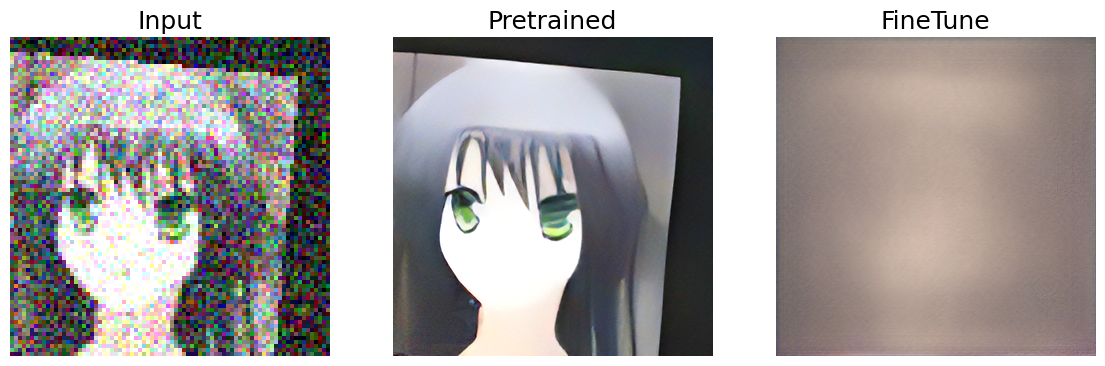

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(14, 14))
axs[0].set_title('Input', fontsize=18)
axs[1].set_title('Pretrained', fontsize=18)
axs[2].set_title('FineTune', fontsize=18)
axs[0].imshow(img1)
axs[1].imshow(pre1)
axs[2].imshow(test1)
axs[0].axis(False)
axs[1].axis(False)
axs[2].axis(False)

(-0.5, 319.5, 319.5, -0.5)

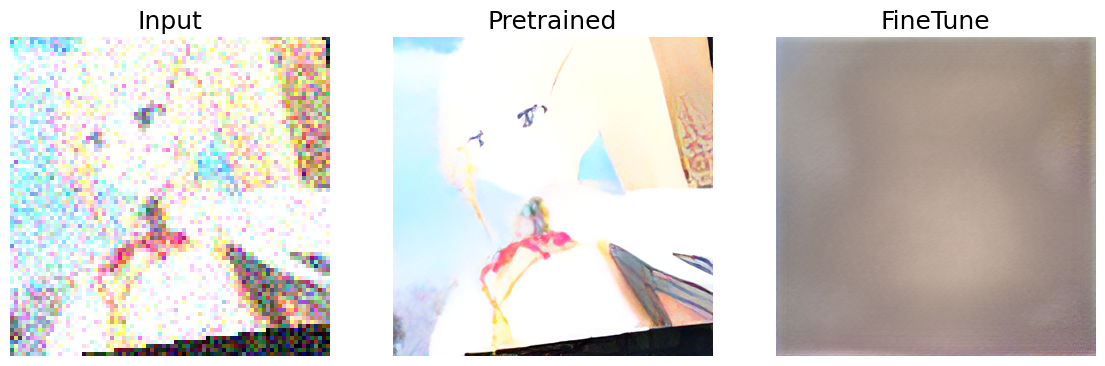

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(14, 14))
axs[0].set_title('Input', fontsize=18)
axs[1].set_title('Pretrained', fontsize=18)
axs[2].set_title('FineTune', fontsize=18)
axs[0].imshow(img2)
axs[1].imshow(pre2)
axs[2].imshow(test2)
axs[0].axis(False)
axs[1].axis(False)
axs[2].axis(False)